In [116]:
import graphviz
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
import graphviz
sns.set()
%matplotlib inline
wine = pd.read_csv("winequality-red.csv")
le = LabelEncoder()

In [117]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [118]:
wine.shape

(1599, 12)

In [119]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [120]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [121]:
import numpy as npy

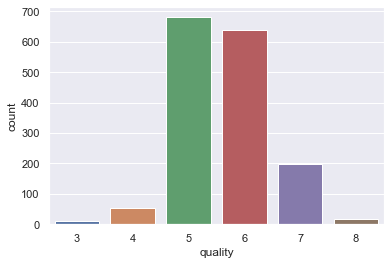

In [122]:
sns.countplot(x='quality',data=wine)

In [11]:
check=[(wine['quality']<5),(wine['quality']==5),(wine['quality']>5)]
per=['no good','normal','good']
wine['per']=npy.select(check,per,default='good')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,per
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,normal
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,normal
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,normal
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,normal


In [13]:
wine.per.value_counts()

good       855
normal     681
no good     63
Name: per, dtype: int64

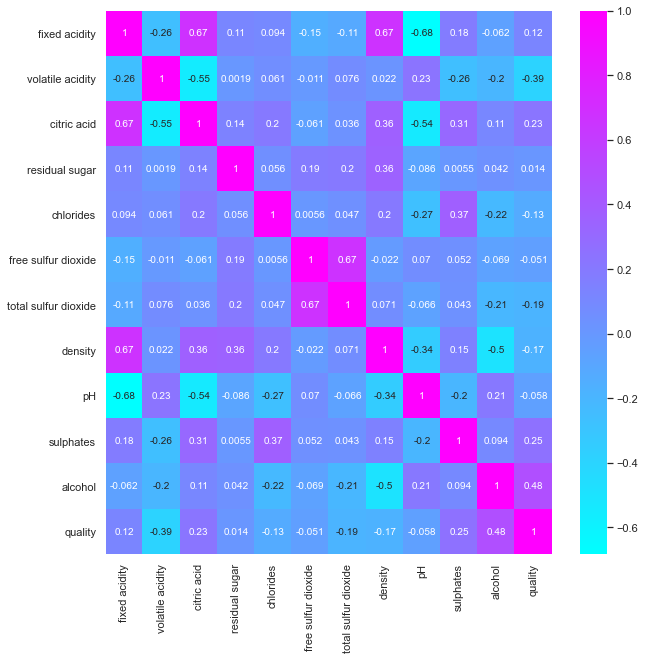

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(wine.corr(),cmap='cool',annot=True)

In [15]:
X = wine.iloc[:,0:11]
y =wine.iloc[:,11]

In [17]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [58]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5979166666666667


In [123]:
from sklearn.linear_model import LinearRegression

In [124]:
lm=LinearRegression()

In [125]:
lm.fit(X_train,y_train)

LinearRegression()

In [62]:
print(lm.intercept_)

21.011050088279013


In [63]:
coeff_df=pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

In [64]:
coeff_df

,Coefficient
fixed acidity,0.020236
volatile acidity,-1.213856
citric acid,-0.098456
residual sugar,0.022102
chlorides,-1.897619
free sulfur dioxide,0.001994
total sulfur dioxide,-0.003004
density,-16.724907
pH,-0.397705
sulphates,0.854179


In [126]:
y_hat = lm.predict(X_test)

In [82]:
print('MAE:', metrics.mean_absolute_error(y_test, y_hat))
print('MSE:', metrics.mean_squared_error(y_test, y_hat))

MAE: 0.4871262164592794
MSE: 0.40078036637500475


In [65]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [66]:
for k in range(2,10):
  kmeans = KMeans(init='k-means++',n_clusters=k)
  kmeans.fit(X)
  clusters = kmeans.predict(X)
  sil = silhouette_score(X,clusters)
  print ("sil: ",sil," K:" ,k)  

sil:  0.6034220347331241  K: 2
sil:  0.5197446557038226  K: 3
sil:  0.48971967046233833  K: 4
sil:  0.44642187844374576  K: 5
sil:  0.44103374541793544  K: 6
sil:  0.3940373555812897  K: 7
sil:  0.391082242766755  K: 8
sil:  0.3800347760217212  K: 9


In [67]:
from sklearn.decomposition import PCA 

In [135]:
kmeans = KMeans(init='k-means++',n_clusters=2)
kmeans.fit(X)
clusters = kmeans.predict(X)
sil = silhouette_score(X,clusters)
print ("sil: ",sil," K:" ,2) 

sil:  0.6034220347331241  K: 2


In [136]:
pca = PCA (n_components=2)
mat = pd.DataFrame(pca.fit_transform(X))
mat.head()

,0,1
0,-13.224905,-2.023900
1,22.037724,4.408322
2,7.162673,-2.501461
3,13.430063,-1.951122
4,-13.224905,-2.023900


In [137]:
clusters
np.unique(clusters)

array([0, 1], dtype=int32)

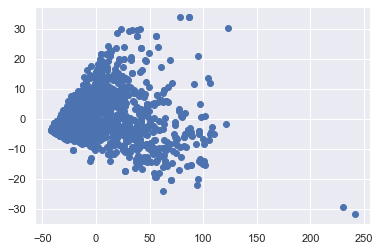

In [138]:
import matplotlib.pyplot as plt
plt.scatter(mat[0],mat[1])

In [139]:
Color={0:'r',1:'b',2:'g'}

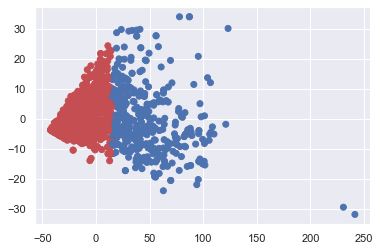

In [140]:
c_color = [Color[i] for i in clusters]
plt.scatter(mat[0],mat[1],c=c_color)

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
v=[]
krange = list(range(2,10))

In [75]:
for k in krange:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    kpred=knn.predict(X)
    v.append(metrics.accuracy_score(kpred,y))

In [76]:
v

[0.8105065666041276,
 0.7554721701063164,
 0.6985616010006254,
 0.6704190118824265,
 0.6522826766729206,
 0.6291432145090682,
 0.6228893058161351,
 0.5991244527829893]

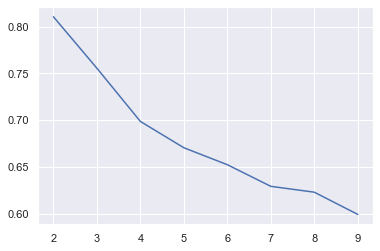

In [77]:
plt.plot(krange,v)

In [34]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X,y)
kpred=knn.predict(X)
print()

0.8105065666041276


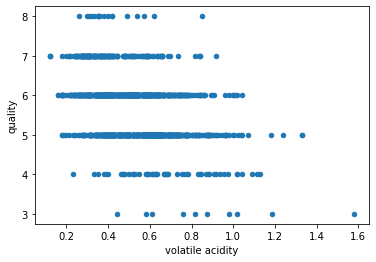

In [5]:
wine.plot.scatter(x='volatile acidity',y='quality')

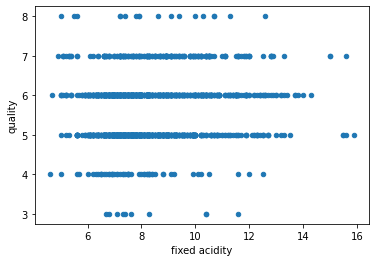

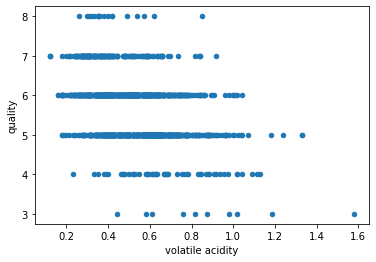

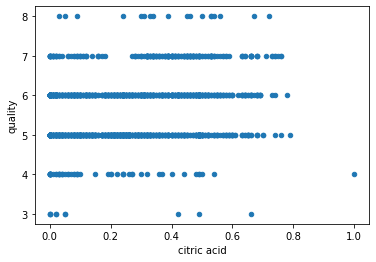

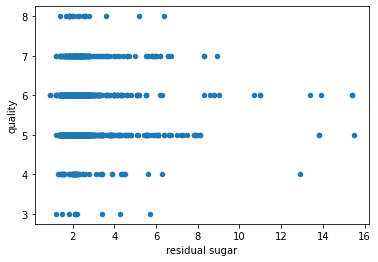

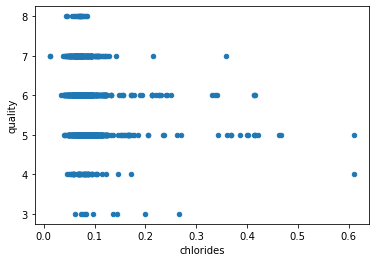

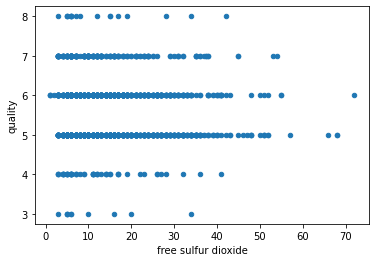

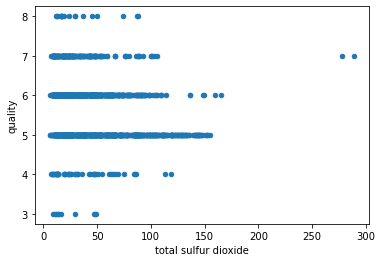

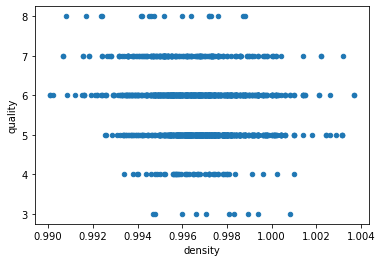

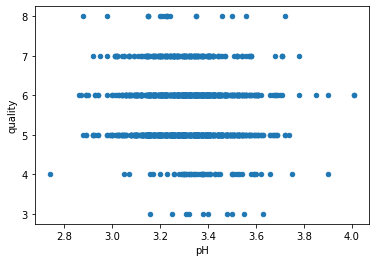

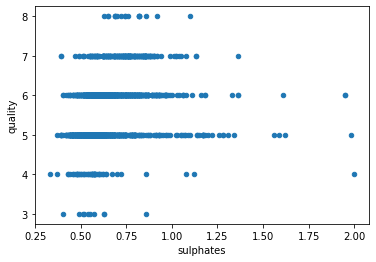

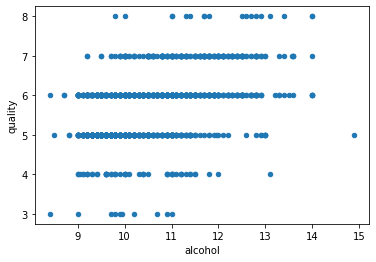

In [8]:
for V in wine.columns[:-1]:
    wine.plot.scatter(x=V,y='quality')

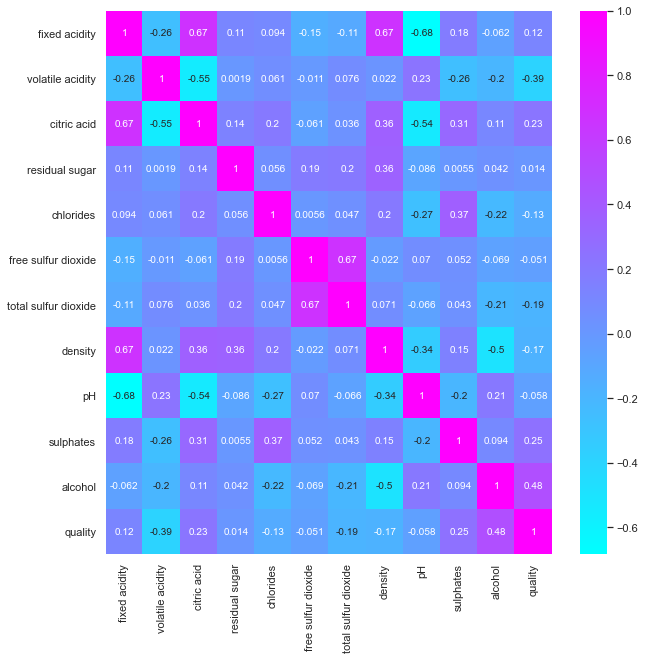

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(wine.corr(),cmap='cool',annot=True)

In [14]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

y_pred=rfc.predict(X_test)

NameError: name 'X_train' is not defined

In [15]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

NameError: name 'y_test' is not defined

In [13]:
feature_imp = pd.Series(rfc.feature_importances_,).sort_values(ascending=False)
feature_imp

NameError: name 'rfc' is not defined

[[8.53902098e+00 5.17363636e-01 2.74615385e-01 2.38706294e+00
  8.39804196e-02 8.31468531e+00 2.05272727e+01 9.96612769e-01
  3.30483916e+00 6.48391608e-01 1.06121212e+01 5.74685315e+00]
 [8.07132075e+00 5.49037736e-01 2.77811321e-01 2.90660377e+00
  9.10339623e-02 2.47320755e+01 8.26188679e+01 9.97007585e-01
  3.32286792e+00 6.44037736e-01 1.01515094e+01 5.47169811e+00]
 [8.03009709e+00 5.50145631e-01 3.17087379e-01 3.33446602e+00
  8.95339806e-02 2.97135922e+01 1.29864078e+02 9.97041456e-01
  3.22805825e+00 6.88737864e-01 9.85631068e+00 5.11650485e+00]
 [8.20096899e+00 5.26957364e-01 2.53217054e-01 2.40135659e+00
  9.00523256e-02 1.90397287e+01 4.71996124e+01 9.96739399e-01
  3.33034884e+00 6.72810078e-01 1.04134367e+01 5.67054264e+00]]


array([0., 1., 3., ..., 3., 3., 3.])

KeyError: 'x'